# importing dependencies

In [188]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import pickle

In [189]:
# import pandas as pd
# import math

# # Define the counts for each type of vehicle (example values)
# data = pd.DataFrame({
#     'no_of_cars': [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
#     'no_of_buses': [0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
#     'no_of_trucks': [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5],
#     'no_of_rickshaws': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6],
#     'no_of_bikes': [1, 1, 2, 4, 5, 7, 8, 10, 11, 13, 14]
# })

# # Calculate the total number of vehicles
# data['no_of_vehicles'] = (data['no_of_cars'] + data['no_of_buses'] +
#                           data['no_of_trucks'] + data['no_of_rickshaws'] +
#                           data['no_of_bikes'])

# # Define the average speeds of vehicles
# speeds = {'car': 2.25, 'bus': 1.8, 'truck': 1.8, 'rickshaw': 2, 'bike': 2.5}

# # Calculate the green time for each row
# noOfLanes = 4  # Example value for the number of lanes
# data['green_time'] = data.apply(lambda row: math.ceil(
#     ((row['no_of_cars'] * speeds['car']) +
#      (row['no_of_rickshaws'] * speeds['rickshaw']) +
#      (row['no_of_buses'] * speeds['bus']) +
#      (row['no_of_trucks'] * speeds['truck']) +
#      (row['no_of_bikes'] * speeds['bike'])) / (noOfLanes + 1)), axis=1)

# # Save the new dataset to a CSV file
# data.to_csv('traffic_data.csv', index=False)

# print(data.head())

> Setting Data_Frame to Pandas, Loading files, and setting the data X and Y

In [190]:
df = pd.read_csv('traffic_data.csv')
# Split the data into features and target
X = df[['no_of_cars', 'no_of_buses', 'no_of_trucks', 'no_of_rickshaws', 'no_of_bikes', 'no_of_vehicles']]
y = df['green_time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Creating th Training Model +fitting it with data

In [191]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [192]:
model.coef_,model.intercept_  # finding coeficeint and intercipt pointwith y axis to draw the Red Regression Line

(array([ 0.13271296,  0.06886185, -0.00250537, -0.00250537,  0.13521832,
         0.33178239]),
 0.7831782390837461)

In [193]:
y_pred = model.predict(X_test)
y_pred

array([11.54545455,  2.04395132, 20.18181818])

In [194]:
train_accuracy= model.score(X_train,y_train)
train_accuracy

0.998804950917627

In [195]:
test_accuracy= model.score(X_test,y_test)
test_accuracy

0.9979474677080157

In [196]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.11083674376715176


In [197]:
example_data = {
    'no_of_cars': 10,
    'no_of_buses': 3,
    'no_of_trucks': 2,
    'no_of_rickshaws': 5,
    'no_of_bikes': 7,
    'no_of_vehicles': 10 + 3 + 2 + 5 + 7
}
input_data = np.array([[example_data['no_of_cars'], example_data['no_of_buses'], example_data['no_of_trucks'], example_data['no_of_rickshaws'], example_data['no_of_bikes'], example_data['no_of_vehicles']]])
prediction = model.predict(input_data)

print(f"Prediction: {prediction}")

Prediction: [12.20400859]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Save Model To a File Using sklearn joblib

In [198]:
import joblib
# from sklearn import joblib
joblib.dump(model, 'model.joblib')

['model.joblib']

# Load Saved Model from joblib

In [199]:
import joblib
mj = joblib.load('./model.joblib')
mj.coef_


array([ 0.13271296,  0.06886185, -0.00250537, -0.00250537,  0.13521832,
        0.33178239])

ValueError: x and y must be the same size

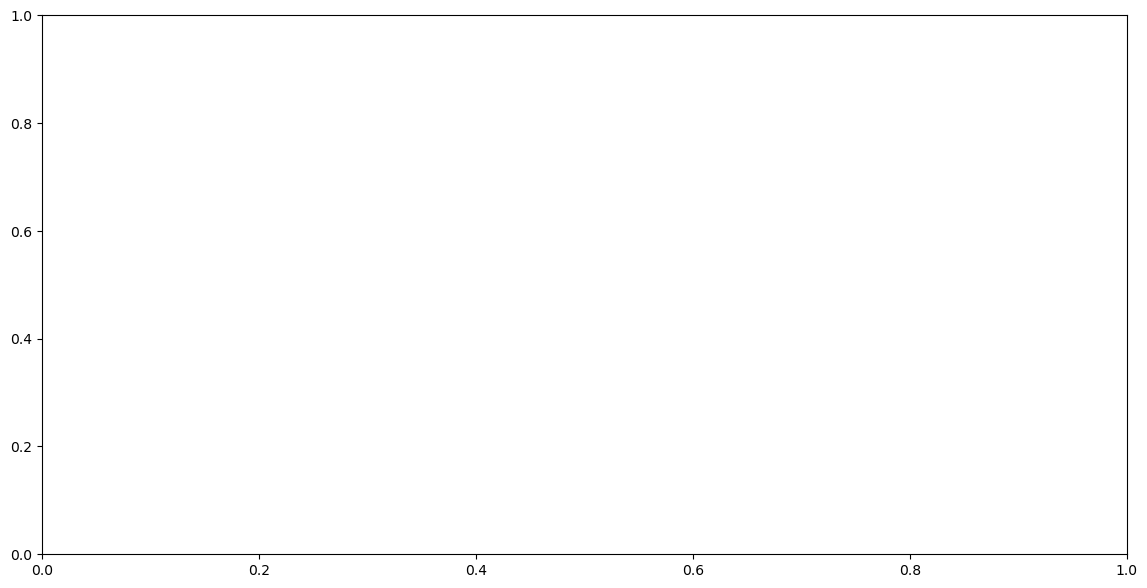

In [201]:
%matplotlib inline
# Assuming X and y are defined somewhere above in the code
X = np.array(X).flatten()  # Ensure X is a 1D array
y = np.array(y).flatten()  # Ensure y is a 1D array

plt.figure(figsize=(14,7))
plt.scatter(X, y)
plt.xlabel("Number of cars percentile")
plt.ylabel("Green time of Lanes #1 & #2")
plt.title(f"Train Accuracy= {train_accuracy}")

m, b = np.polyfit(X, y, 1)
plt.plot(X, m*X + b, 'Red')
plt.show()


